# Исследование продаж компьютерных видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


Нам передеали данные о интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** Нужно выявить определяющие успешность игры закономерности.

**Ход исследования:** 
Я получу данные о компьютерных видеоиграх из `/datasets/games.csv` , о качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе подготовки данных я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдёт в шесть этапов:
- Обзор данных
- Подготовка данных
- Исследовательский анализ данных
- Создание портрета пользователя каждого региона
- Проверка гипотез
- Написание общего вывода

## Шаг №1 Обзор данных 

Добавим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from pandas.plotting import scatter_matrix
import seaborn as sns

Считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv',sep=',')
except:
    data = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project4_games/datasets/games.csv',sep=',')

Изучим общую информацию

In [3]:
data.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В данных имеются пропуски, нужно их обработать и изменить тип данных в некоторых столбцах

## Шаг №2 Подготовка данных

### Заменим названия столбцов (приведение к нижнему регистру);

In [6]:
data.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [7]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

In [8]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Обработаем пропуски

**Столбец** `name`:
- Данные пропуски мы не можем заполнить ни средним, ни медианой, ни другим любым способом поэтому чтобы не искажать резалуьтаты исследования, эти пропуски мы исключим из наших данных
- Возможные причины, которые могли привести к пропускам, могут быть следующими: неправильно выгружены данные либо человечиский фактор, при заполнении данных, пропустили столбец `name`

In [9]:
data = data.dropna(subset=['name'])

**Столбец** `year_of_release`:
- Данные пропуски мы не можем заполнить ни средним, ни медианой, поэтому чтобы не искажать резалуьтаты исследования, эти пропуски мы исключим из наших данных
- Возможные причины, которые могли привести к пропускам, могут быть следующими: неправильно выгружены данные либо человечиский фактор, при заполнении данных, пропустили столбец `year_of_release`

In [10]:
data = data.dropna(subset=['year_of_release'])

**Столбец** `critic_score`,`user_score`:
- Данные пропуски мы объективно не можем заполнить, так как если мы заполним их например: медианой, средним, группировкой по каким-то параметрам, то мы с высокой вероятность сильно можем исказить результаты исследования, поэтому данные пропуски мы заполним значением - `0`
- Воможные причины , которые могли привести к пропускам, могут быть следующими: неправильно выгружены данные либо человечиский фактор, при заполнении данных был пропущен столбец, так же игра могла не набрать достаточно данных для получения результата например из-за плохой рекламной компании и отсутсвия пользователей или других факторов, либо находится только в стадии набора данных для получения оценки.

In [11]:
data[['critic_score','user_score']] = data[['critic_score','user_score']].fillna('0')

In [12]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Столбец** `user_score`:
- TBD — это популярная аббревиатура, которая означает «to be determined». Она используется, чтобы сообщить что, время события, цена или место, ещё не определено. В нашем случае это означает, что рейтинг игры еще не определен. Поэтому такие значения мы заменим на `-1`

In [13]:
data['user_score'] = data['user_score'].replace('tbd', -1)

**Столбец** `rating`: 
- Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Чтобы не искажать результаты исследования, такие значения мы оставим пропущенными.
- Возможные причины которые могли привести к пропускам могут быть следующими: неправильно выгружены данные либо человечиский фактор, при заполнении данных был пропущен столбец, так же игра может быть непопулярной, поэтому у нее нету рейтинга от данной организации

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

**Промежуточный вывод:** Все пропуски которые можно было обработать, обработаны. 

### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


**Столбец `year_of_release`:** Заменим float на int, так как год выпуска это целое число

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int)

**Столбец `critic_score`:** Заменим object на int, так как у нас целая 100 бальная система оценки

In [17]:
data['critic_score'] = data['critic_score'].astype(int)

**Столбец `user_score`:** Заменим object на float, так как пользовательский рейтинг должен быть числом с плавающей точкой 

In [18]:
data['user_score'] = data['user_score'].astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
data['sum_region'] = data['na_sales'] + data ['eu_sales'] + data ['jp_sales'] + data ['other_sales']

In [21]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_region
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


**Промежуточный вывод:** 
Все необходимые этапы предобработки данных были выполнены:

- Пропуски обработаны или удалены.
- Типы данных преобразованы для удобства дальнейшего анализа.
- Добавлен новый столбец с суммарными продажами во всех регионах.

Теперь данные готовы для дальнейшего анализа и выявления закономерностей, определяющих успешность игр.

## Шаг 3. Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Определим  важны ли данные за все периоды?

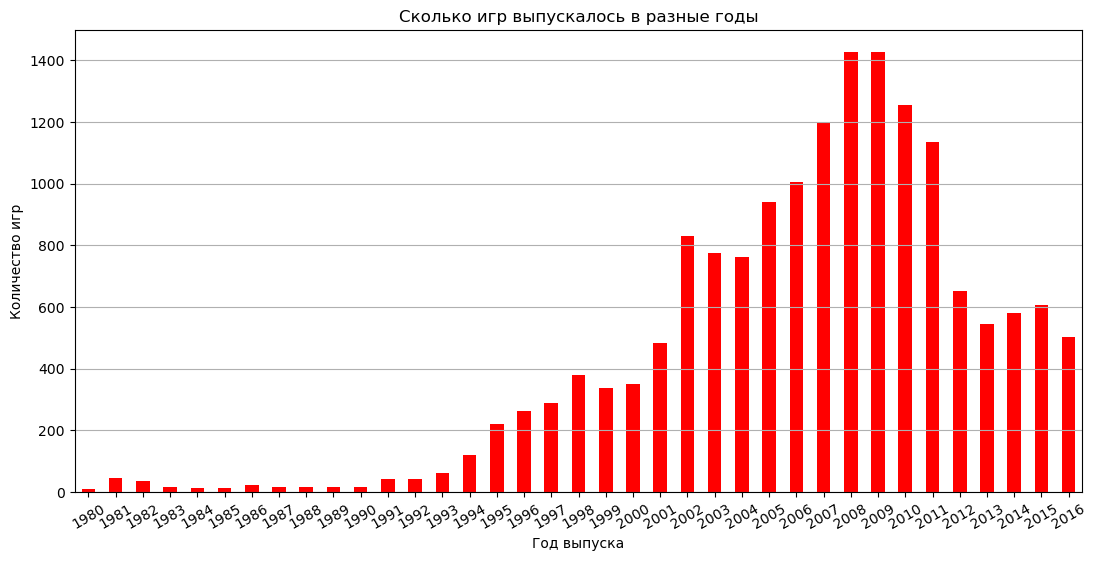

In [22]:
age_counts = data['year_of_release'].value_counts()

age_counts_sorted = age_counts.sort_index()

age_counts_sorted.plot(kind='bar',color='red', figsize=(13, 6))
plt.xticks(rotation=30)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Сколько игр выпускалось в разные годы')
plt.grid(True,axis='y')
plt.show()

**Промежуточный вывод:** По графику видно, диапозон с 1980 года по 2016 год, до 1995 выпускалось крайне мало игр, после 1985 выпуск игр начал увеличиваться, потому что появились новые технологии и вырос спрос, основной пик с 2007 года по 2011 год, далее появляется спад количества новых продуктов, думаю это связано с тем, что до 2011 года было уже выпущено достаточно продуктов в игровой сфере, и после 2011 года людей хотят привлекать не количеством новых продуктов, а качеством, из-за этого увлечивается продолжительность разработки новых продуктов и в следтвии уменьшается их количество. Исходя из графика, считаю важными данными с 1995 года по 2016 год

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим продажи по всем платформам и выберем с наибольшими суммами 

In [23]:
data.groupby('platform')['sum_region'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_region, dtype: float64

**Промежуточный вывод:** Плтаформы с наибольшими суммарными продажами это - `PS2` ,`X360` ,`PS3` ,`Wii` ,`DS`.
Изучим как менялись продажи с годами

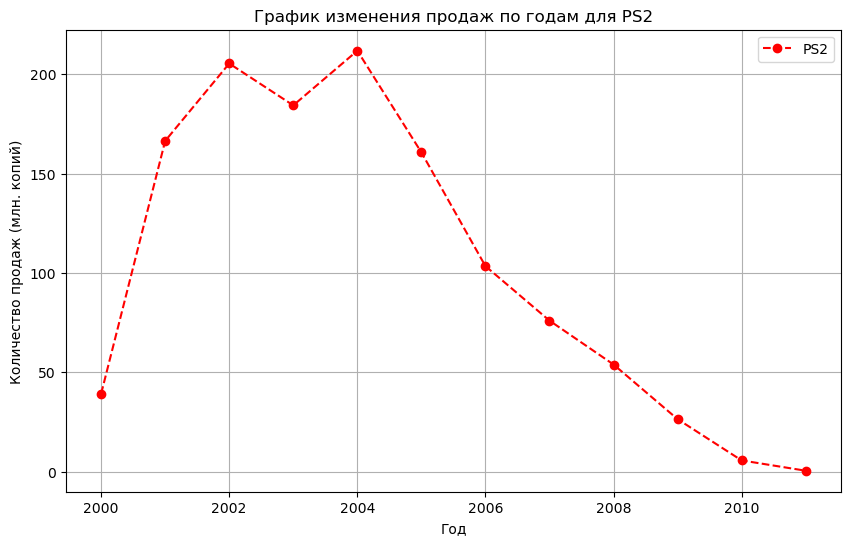

In [24]:
ps2_data = data[data['platform'] == 'PS2']

ps2_yearly_sales = ps2_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ps2_yearly_sales.index, ps2_yearly_sales, marker='o',linestyle='--', label='PS2', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для PS2')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи PS2 начались в 2000 году и стремительно увеличивались до 2004 года, после продажи с каждым годом начали уменьшаться вплоть до 2011 года. 

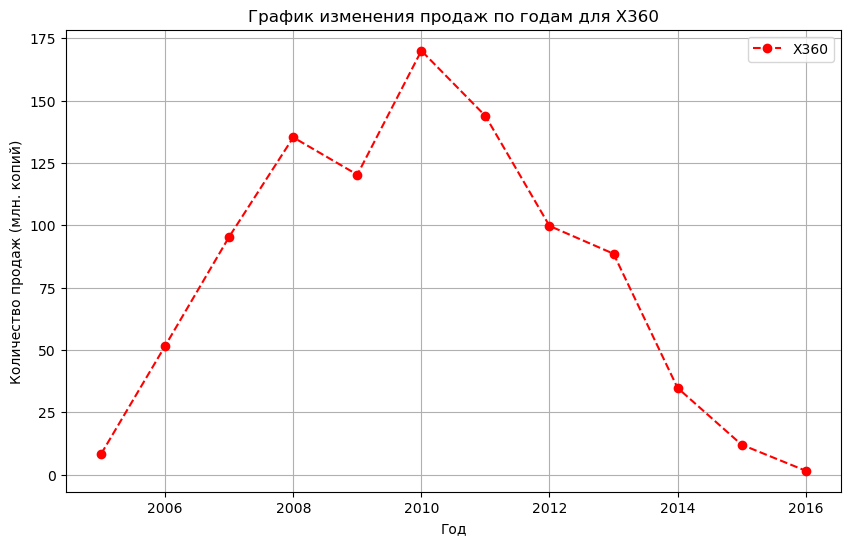

In [25]:
x360_data = data[data['platform'] == 'X360']

x360_yearly_sales = x360_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(x360_yearly_sales.index, x360_yearly_sales, marker='o',linestyle='--', label='X360', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для X360')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи X360 начались в 2005 году и стремительно увеличивались до 2010 года, после продажи с каждым годом начали уменьшаться. 

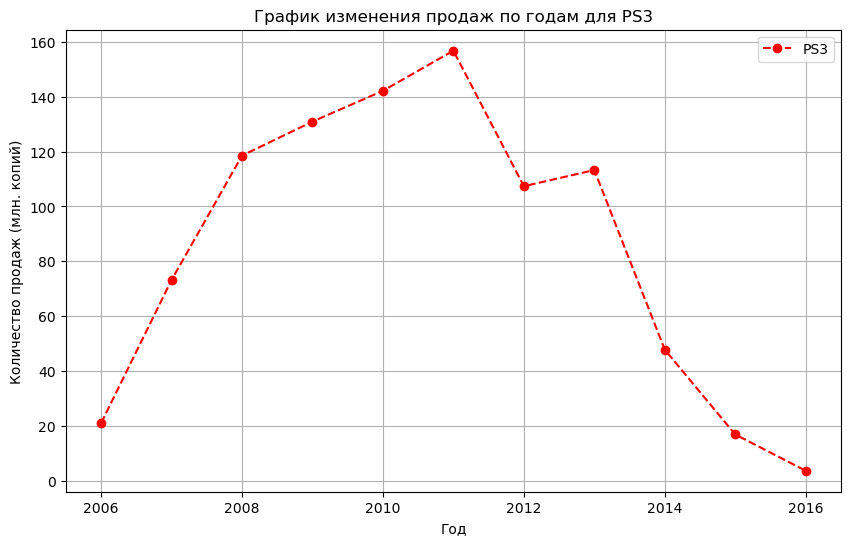

In [26]:
ps3_data = data[data['platform'] == 'PS3']

ps3_yearly_sales = ps3_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ps3_yearly_sales.index, ps3_yearly_sales, marker='o',linestyle='--', label='PS3', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для PS3')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи PS3 начались в 2006 году и стремительно увеличивались до 2011 года, после продажи начали уменьшаться до 2012 года, в 2013 произошло небольшое увеличение по сравнению с 2012 и далее с каждым годом продажи сильно уменьшаются

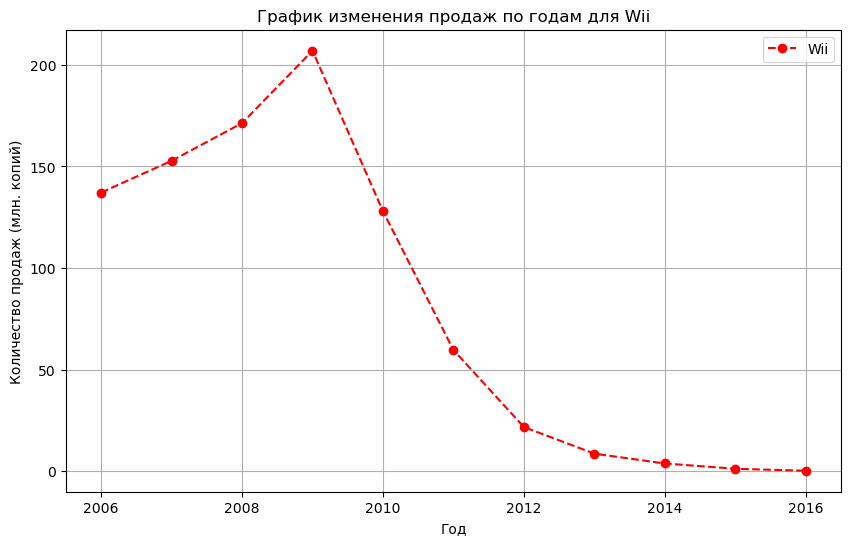

In [27]:
wii_data = data[data['platform'] == 'Wii']

wii_yearly_sales = wii_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(wii_yearly_sales.index, wii_yearly_sales, marker='o',linestyle='--', label='Wii', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для Wii')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи Wii начались в 2006 году и стремительно увеличивались до 2009 года, после с каждым годом продажи так же стремительно уменьшались.

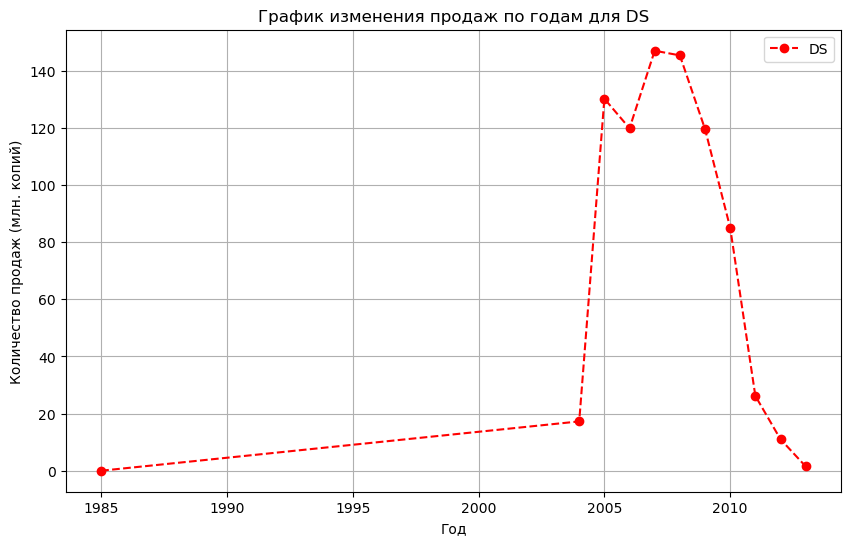

In [28]:
ds_data = data[data['platform'] == 'DS']

ds_yearly_sales = ds_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ds_yearly_sales.index, ds_yearly_sales, marker='o',linestyle='--', label='DS', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для DS')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи DS начались в 1985 году, с 2004 года началось резкое увелечение продаж вплоть до 2009 года, после 2009 года продажи с каждым годом начали уменьшаться вплоть 2014 года.

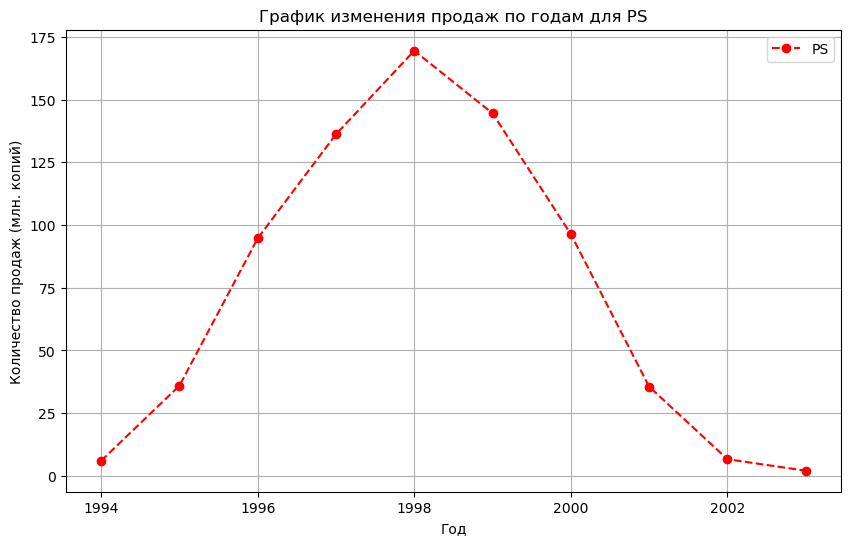

In [29]:
ps_data = data[data['platform'] == 'PS']

ps_yearly_sales = ps_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ps_yearly_sales.index, ps_yearly_sales, marker='o',linestyle='--', label='PS', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для PS')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи PS начались в 1994 году и стремительно увеличивались до 1998 года, после с каждым годом продажи начали уменьшались вплоть до 2001 года.

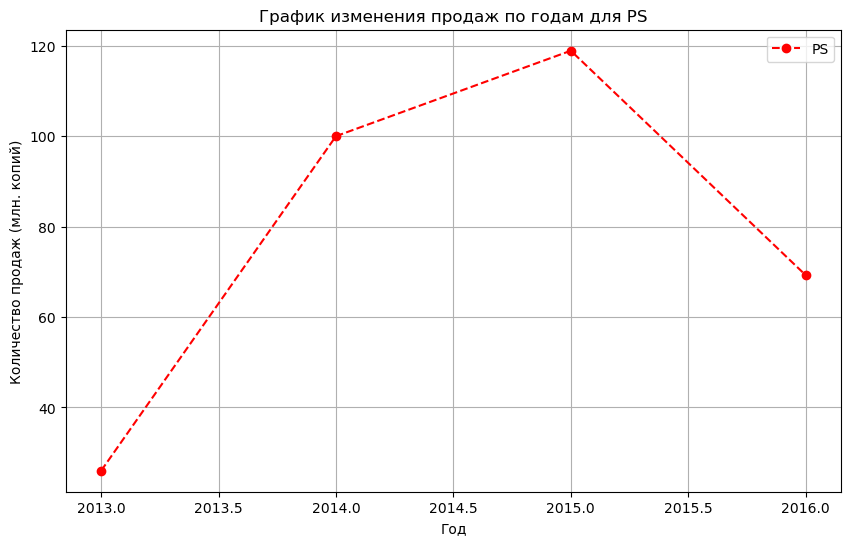

In [30]:
ps4_data = data[data['platform'] == 'PS4']

ps4_yearly_sales = ps4_data.groupby('year_of_release')['sum_region'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ps4_yearly_sales.index, ps4_yearly_sales, marker='o',linestyle='--', label='PS', color='red')
plt.xlabel('Год')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('График изменения продаж по годам для PS')
plt.legend()
plt.grid(True)
plt.show()

**Промежуточный вывод:** Продажи PS4 начались в 2013 году, в 2015 году был пик продаж

**Общий вывод:** Мы построили распределение пяти платформ с наибольшими суммарными продажами по годам, изучив графики мы можем сказать , что новые продукты появляются за 4-5 лет использования передыдущего поколения платформ, а исчезают в среднем за 9-10 лет использования.

### Возьмем данные за соответствующий актуальный период, чтобы построить прогноз на 2017 год. Актуальный период это 2013-2016 год. 

In [31]:
df = data.query('year_of_release >= 2013')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int64  
 9   user_score       2233 non-null   float64
 10  rating           1256 non-null   object 
 11  sum_region       2233 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 226.8+ KB


**Промежуточный вывод:** Мы взяли данные за 2013-2016 год и получили 2233 строки.

### Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [33]:
df.groupby('platform')['sum_region'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: sum_region, dtype: float64

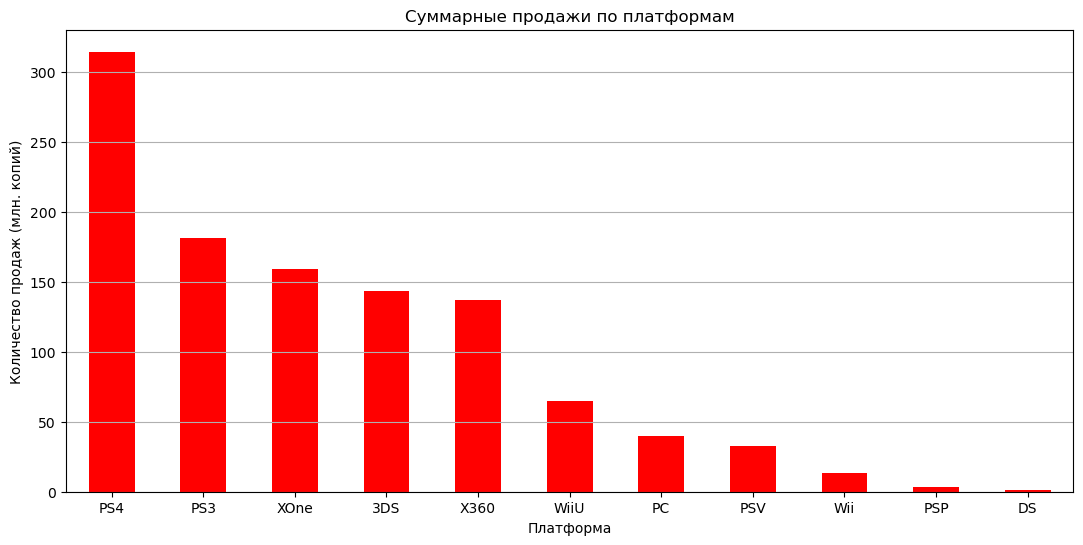

In [34]:
age_counts = df.groupby('platform')['sum_region'].sum().sort_values(ascending=False)

# Построение столбчатой диаграммы с отсортированными по y столбцами
plt.figure(figsize=(13, 6))
age_counts.plot(kind='bar', color='red')
plt.xticks(rotation=0)
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн. копий)')
plt.title('Суммарные продажи по платформам')
plt.grid(True, axis='y')
plt.show()

**Лидирующие платформы по продажам**

- PS4 (314.14 млн. копий)
- PS3 (181.43 млн. копий)
- Xbox One (XOne) (159.32 млн. копий)
- Nintendo 3DS (143.25 млн. копий)
- Xbox 360 (X360) (136.80 млн. копий)

**Платформы со средним уровнем продаж**
- Wii U (64.63 млн. копий)
- PC (39.43 млн. копий)
- PS Vita (PSV) (32.99 млн. копий)

**Платформы с низким уровнем продаж**

- Wii (13.66 млн. копий)
- PSP (3.50 млн. копий)
- Nintendo DS (1.54 млн. копий)

**Потенциально прибыльные платформы**

- PS4 – Лидирует по продажам и продолжает показывать высокие результаты.
- Xbox One (XOne) – Высокие продажи и потенциал для роста.
- Nintendo 3DS – Хорошие показатели продаж, возможны инвестиции в игры для этой платформы.

**Платформы, продажы которых падают**
- PS3 – Продажи значительно ниже, чем у PS4, что указывает на снижение интереса.
- Xbox 360 – Устаревшая платформа, продажи которой снижаются.
- Wii U – Продажи не достигают уровня топовых платформ, возможен спад.

**Промежуточный вывод:** Для максимизации прибыли стоит рассмотреть инвестиции в разработки игр и маркетинг для платформ PS4, Xbox One и Nintendo 3DS. Также можно следить за тенденциями и новыми релизами, чтобы вовремя адаптироваться к изменяющимся условиям рынка.


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

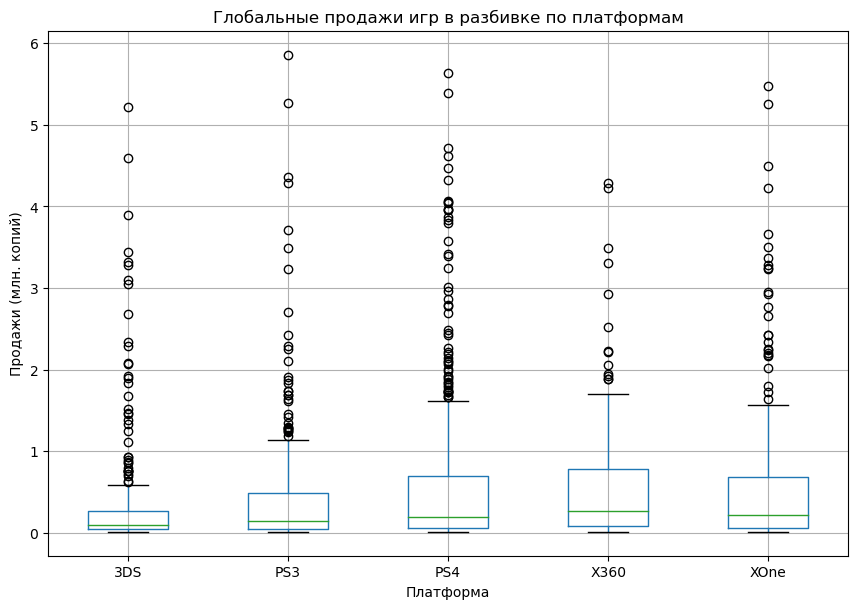

In [35]:
#df_us = df.query('sum_region < 6')
selected_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
df_filtered = df.query('sum_region < 6 and platform in @selected_platforms')
df_filtered.boxplot(column="sum_region", by="platform",figsize=(10, 7))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.show()

- **Центральная линия в каждом ящике** представляет собой медиану продаж для данной платформы.
- **Верхний и нижний края ящика** показывают первый (Q1) и третий (Q3) квартили.
- **"Усы"** выходят за пределы ящика и представляют собой диапазон данных без выбросов.
- **Одиночные точки выше или ниже "усов"** являются выбросами, указывая на необычно высокие или низкие продажи.

**Промежуточный выовд:**

**PS4 и XOne** демонстрируют наивысшие медианы и множество высоких выбросов, что указывает на успешные продажи многих игр на этих платформах.

**PS3 и X360** также показывают хорошие результаты с высокими медианами и многочисленными выбросами.

**3DS** имеют значительное количество выбросов, что указывает на успешные продажи отдельных игр, несмотря на средние или низкие медианы.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

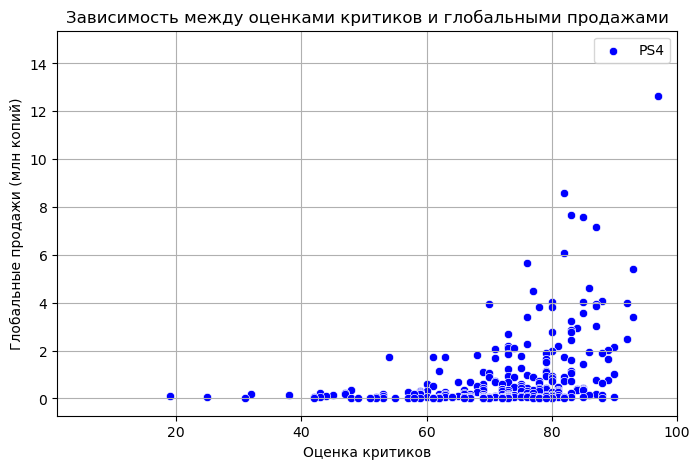

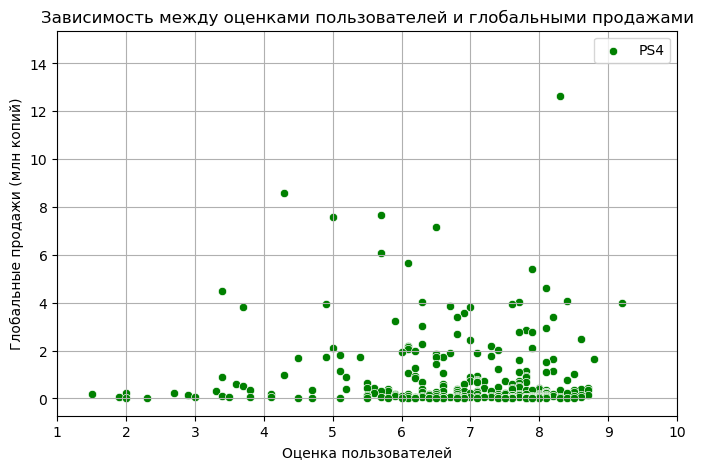

Корреляция между оценкой критика и продажами PS4: 0.22754960627752685
Корреляция между оценкой пользователя и продажами PS4: 0.1145479882741047


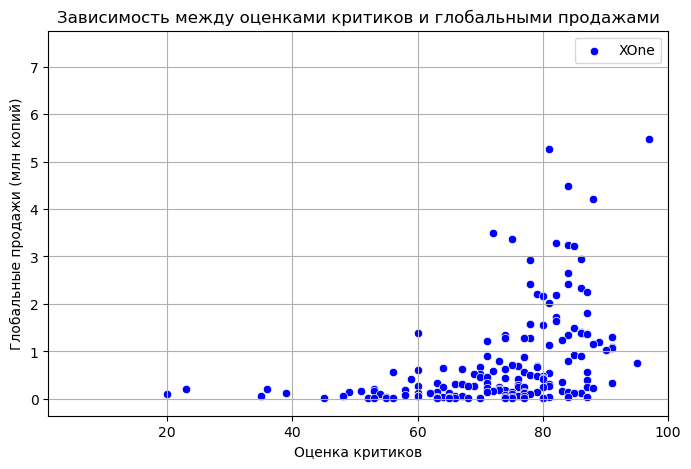

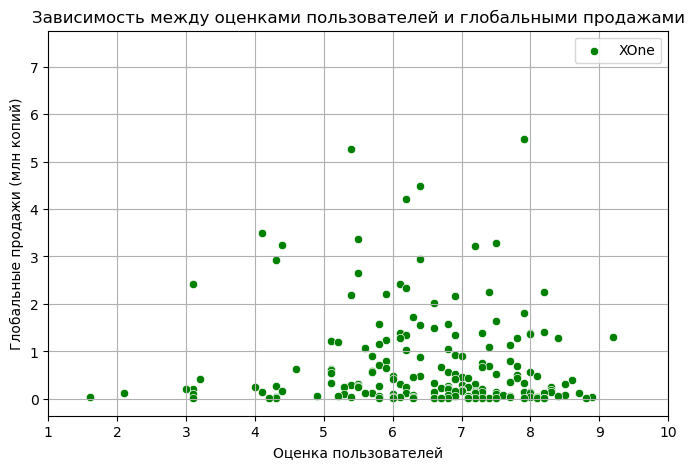

Корреляция между оценкой критика и продажами XOne: 0.27483918749445363
Корреляция между оценкой пользователя и продажами XOne: 0.12187675934482879


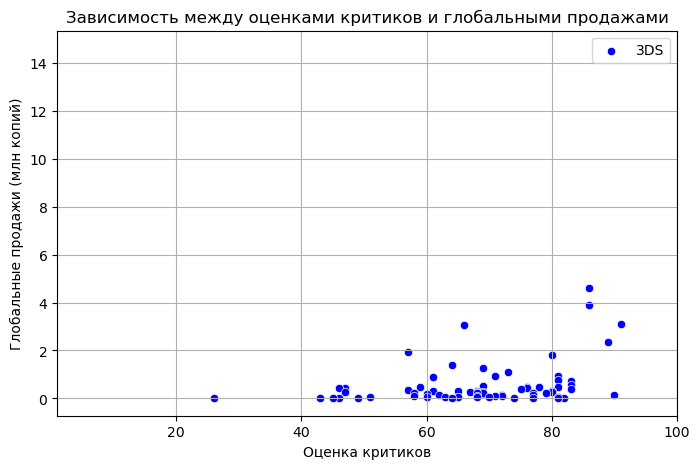

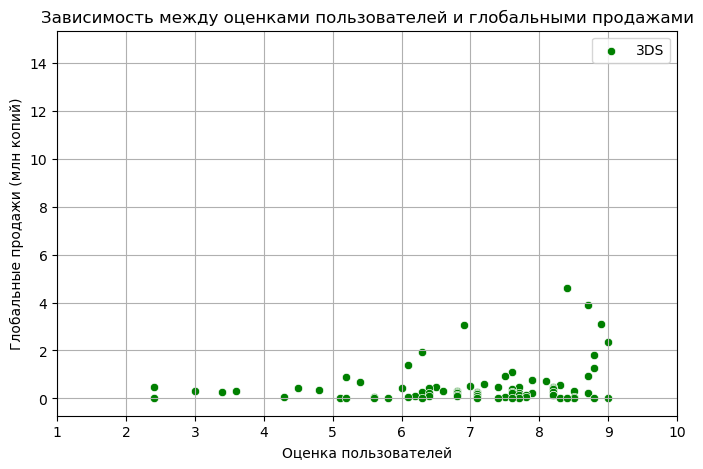

Корреляция между оценкой критика и продажами 3DS: 0.06111339026134985
Корреляция между оценкой пользователя и продажами 3DS: 0.054227615697215396


In [36]:
platforms = ['PS4','XOne','3DS']

for item in platforms:
    
    df_ps4 = df[df['platform'] == item]

    # Построение диаграммы рассеяния для отзывов критиков и продаж
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='critic_score', y='sum_region', data=df_ps4, color='blue', label=item)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи (млн копий)')
    plt.title('Зависимость между оценками критиков и глобальными продажами')
    plt.legend()
    plt.grid(True)
    plt.xlim(1, 100)
    plt.show()

    # Построение диаграммы рассеяния для отзывов пользователей и продаж
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='user_score', y='sum_region', data=df_ps4, color='green', label=item)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Глобальные продажи (млн копий)')
    plt.title('Зависимость между оценками пользователей и глобальными продажами')
    plt.legend()
    plt.grid(True)
    plt.xlim(1, 10)
    plt.show()

    # Вычисление корреляции
    correlation_critic = df_ps4['critic_score'].corr(df_ps4['sum_region'])
    correlation_user = df_ps4['user_score'].corr(df_ps4['sum_region'])

    correlation_critic, correlation_user

    print(f'Корреляция между оценкой критика и продажами {item}: {correlation_critic}')
    print(f'Корреляция между оценкой пользователя и продажами {item}: {correlation_user}')

**Промежуточный вывод:** 

Отзывы критиков имеют большее влияние на продажи игр, чем отзывы пользователей, особенно для платформ PS4 и Xbox One. Это может быть связано с тем, что многие потребители обращают внимание на профессиональные обзоры перед покупкой игры.

Отзывы пользователей также оказывают некоторое влияние на продажи, но оно значительно слабее. Возможно, это связано с тем, что отзывы пользователей могут быть более разнообразными и субъективными, что снижает их влияние на решения о покупке.

Для Nintendo 3DS как оценки критиков, так и оценки пользователей имеют очень слабую корреляцию с продажами, что может указывать на то, что другие факторы (например, доступность игр, маркетинговые кампании, эксклюзивные релизы) оказывают более значительное влияние на продажи игр для этой платформы.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
df.groupby('genre')['sum_region'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: sum_region, dtype: float64

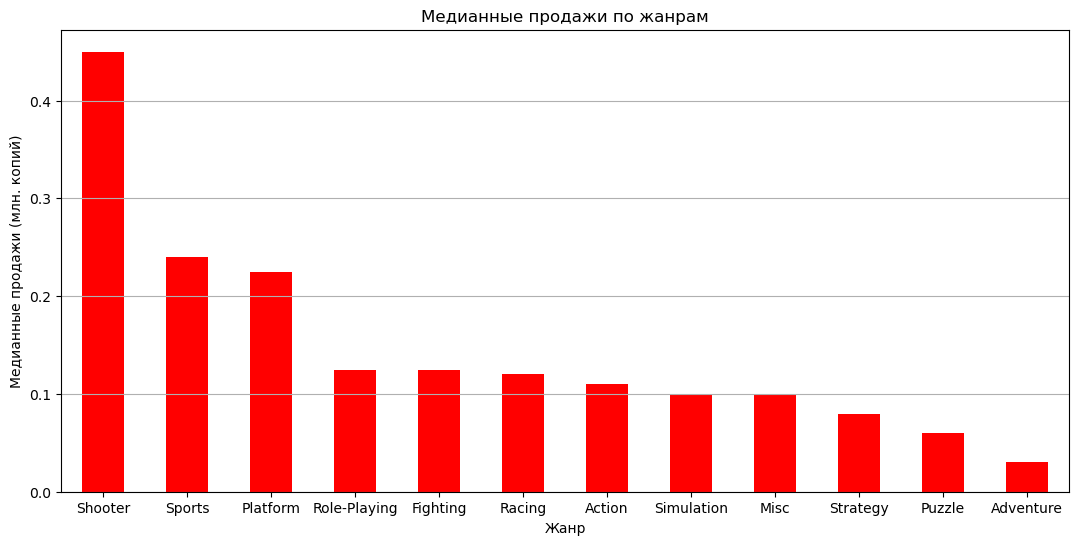

In [38]:
median_sales = df.groupby('genre')['sum_region'].median().sort_values(ascending=False)

# Построим график медианных продаж
plt.figure(figsize=(13, 6))
median_sales.plot(kind='bar', color='red')
plt.xticks(rotation=0)
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (млн. копий)')
plt.title('Медианные продажи по жанрам')
plt.grid(True, axis='y')
plt.show()

**Промежуточный вывод:** 

- **Жанры с высокими медианными продажами:** Shooter, Sports, Platform

- **Жанры со средними медианными продажами:** Role-Playing, Fighting, Racing, Action: 

- **Жанры с низкими медианными продажами:** Simulation, Misc, Strategy, Puzzle, Adventure

Высокие суммарные продажи некоторых жанров могут быть вызваны не столько успехом отдельных игр, сколько большим количеством выпущенных игр в этих жанрах. Например, жанр Action имеет относительно низкую медиану продаж (0.110 млн. копий) при высоких суммарных продажах. Это может указывать на то, что в этом жанре много игр, из которых только некоторые достигли большого успеха, а большинство имеет средние или низкие продажи.

С другой стороны, жанры Shooter и Sports показывают высокие медианные продажи, что указывает на стабильный успех большинства игр в этих жанрах, а не только на количество выпущенных игр. Это подтверждает их популярность и привлекательность для инвестиций.

## Шаг 4. Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

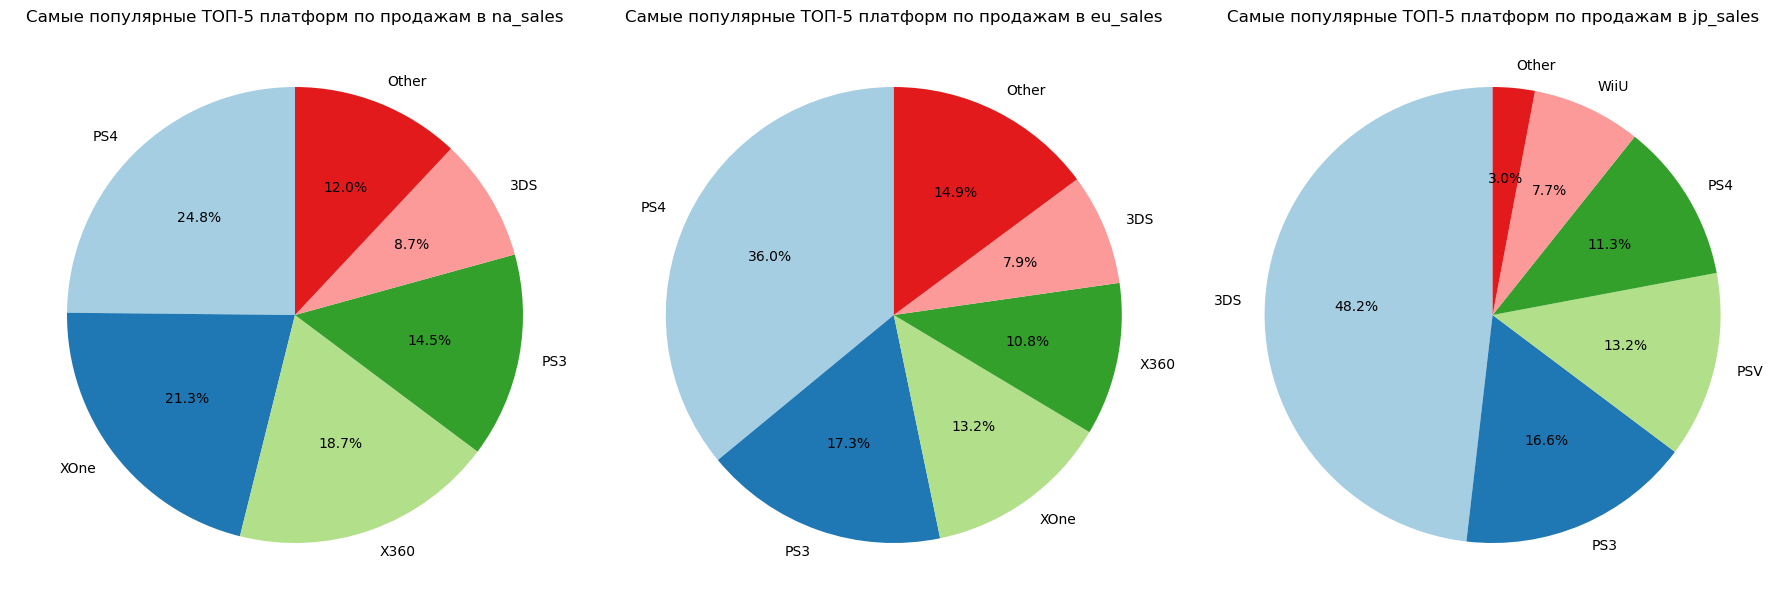

In [39]:
items = ['na_sales', 'eu_sales', 'jp_sales']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, item in enumerate(items):
    
    
    age_counts = df.groupby('platform')[item].sum().sort_values(ascending=False)

    top_n = 5
    top_genres = age_counts.head(top_n)
    other_sales = age_counts[top_n:].sum()
    top_genres['Other'] = other_sales

    top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=axes[idx])
    axes[idx].set_ylabel('') 
    axes[idx].set_title(f'Самые популярные ТОП-5 платформ по продажам в {item}')

plt.tight_layout()
plt.show()

**Промежуточный вывод:**

**Европа:**

PS2 и PS3 доминируют по продажам, показывая высокую популярность PlayStation в этом регионе.
Xbox 360 и Wii также популярны, но уступают PlayStation.

**Япония:**

DS доминирует, что указывает на предпочтение портативных консолей.
PS и PS2 остаются популярными, показывая долгосрочную привлекательность.
SNES также входит в топ-5, что указывает на ностальгическую ценность.

**Северная Америка:**

Xbox 360 лидирует, что отражает высокий интерес к этой платформе в регионе.
PS2 и Wii также пользуются значительной популярностью.
PS3 и DS замыкают топ-5, подчеркивая значимость как домашних, так и портативных консолей.

**Заключение:**

Анализ показывает, что предпочтения игроков варьируются в зависимости от региона. В Европе и Северной Америке доминируют консоли PlayStation и Xbox 360, в то время как в Японии предпочтение отдается портативным консолям, таким как DS и 3DS. Эти различия подчеркивают важность региональных особенностей и необходимость адаптации маркетинговых стратегий к каждому конкретному рынку.

### Самые популярные жанры (топ-5). Поясните разницу.

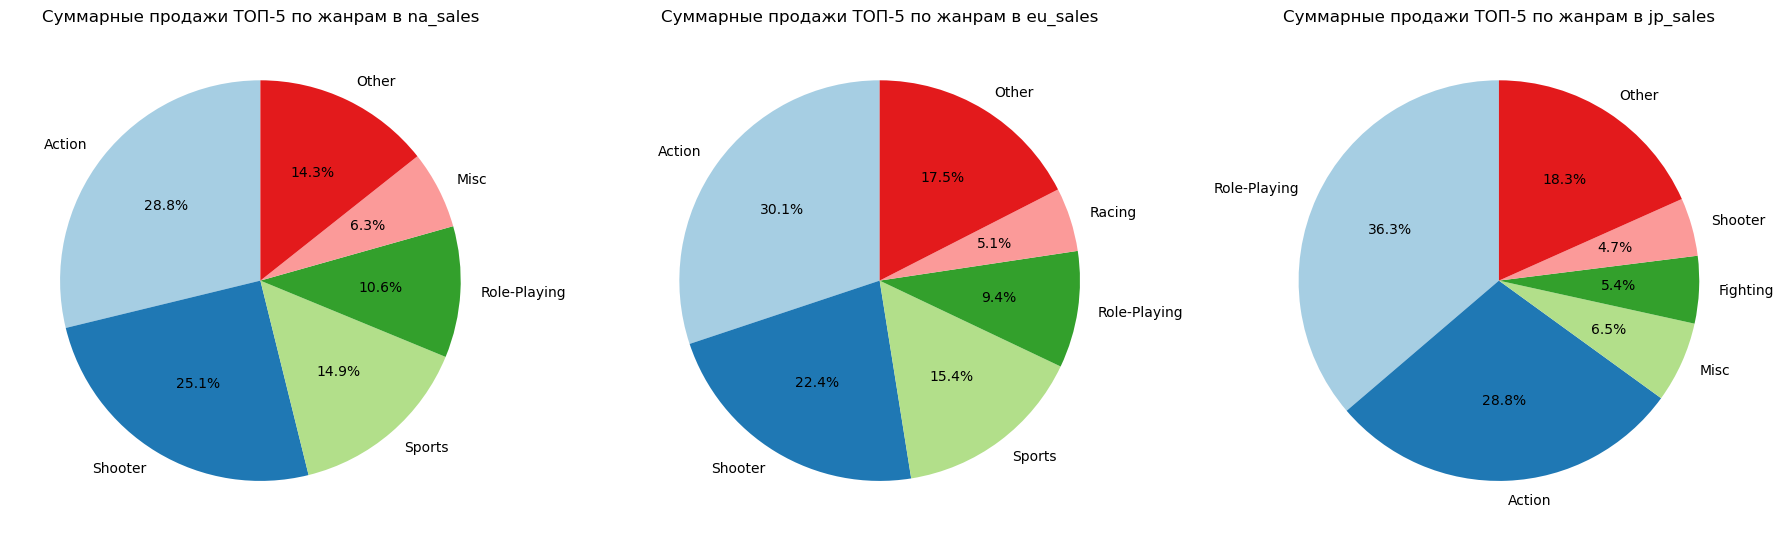

In [40]:
items = ['na_sales', 'eu_sales', 'jp_sales']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, item in enumerate(items):
    
    
    age_counts = df.groupby('genre')[item].sum().sort_values(ascending=False)

    top_n = 5
    top_genres = age_counts.head(top_n)
    other_sales = age_counts[top_n:].sum()
    top_genres['Other'] = other_sales

    top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=axes[idx])
    axes[idx].set_ylabel('')  
    axes[idx].set_title(f'Суммарные продажи ТОП-5 по жанрам в {item}')

plt.tight_layout()
plt.show()

**Промежуточный вывод:**
Анализ продаж показывает, что в Северной Америке и Европе наиболее популярными жанрами являются Action, Sports и Shooter. В Японии же предпочтения несколько иные: наибольший спрос наблюдается на игры жанров Role-Playing, Action и Sports.

Интересно отметить, что жанр Platform пользуется большим спросом в Японии и Северной Америке, в то время как в Европе его популярность ниже, уступая жанру Racing. Это может быть связано с культурными и экономическими особенностями: в Европе больше проводятся различные автогоночные мероприятия, а также доступ к автомобилям может быть ограничен по сравнению с другими регионами. В результате, чтобы получить удовольствие от вождения, европейские пользователи чаще выбирают игры жанра Racing.

Кроме того, жанр Misc показывает примерно одинаковое распределение популярности на всех платформах, что указывает на его универсальную привлекательность для игроков из разных регионов.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

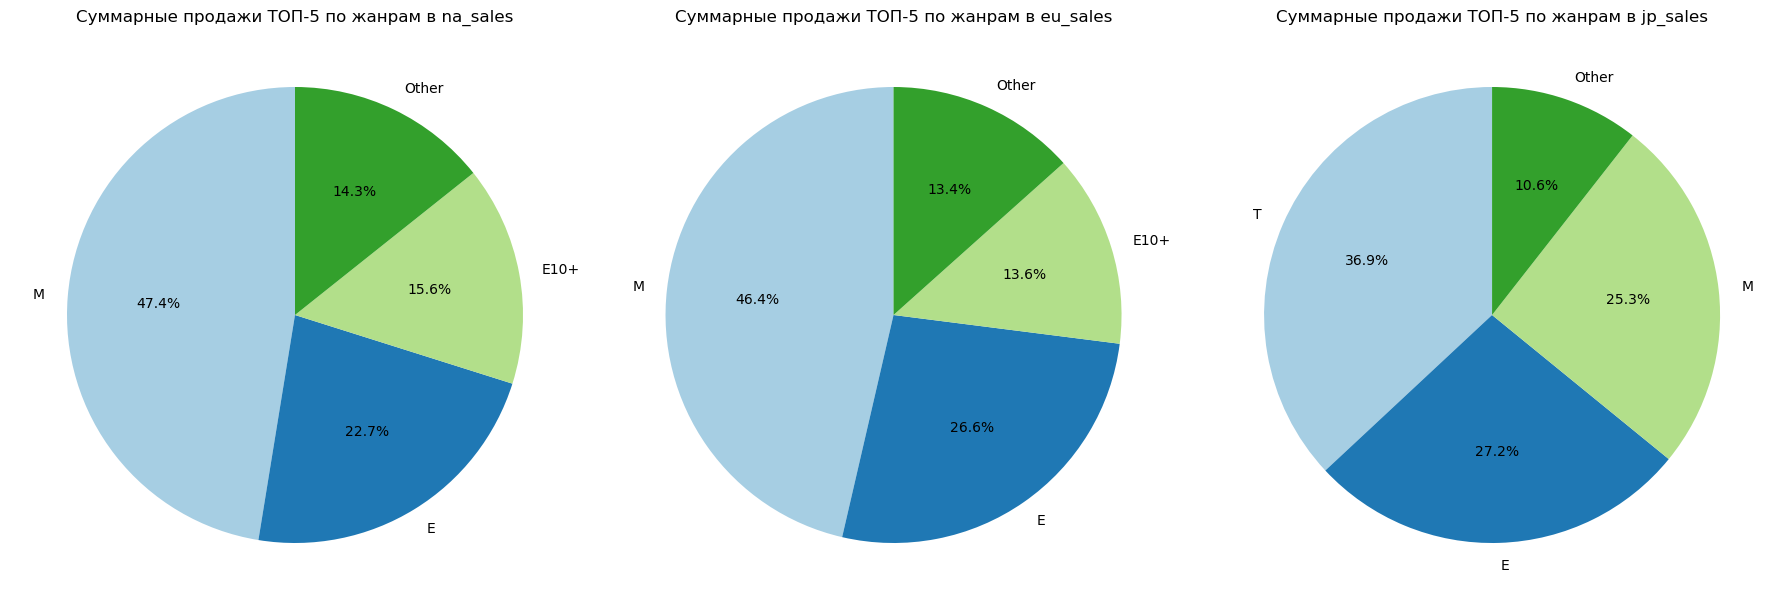

In [41]:
items = ['na_sales', 'eu_sales', 'jp_sales']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, item in enumerate(items):
    
    
    age_counts = df.groupby('rating')[item].sum().sort_values(ascending=False)

    top_n = 3
    top_genres = age_counts.head(top_n)
    other_sales = age_counts[top_n:].sum()
    top_genres['Other'] = other_sales

    top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=axes[idx])
    axes[idx].set_ylabel('') 
    axes[idx].set_title(f'Суммарные продажи ТОП-5 по жанрам в {item}')

plt.tight_layout()
plt.show()

**Промежуточный вывод:** 

- Рейтинг "E" (Для всех):

Лидирует по продажам во всех трех регионах, особенно в Японии (43.6%) и Северной Америке (40.9%).
Это указывает на широкую привлекательность игр с этим рейтингом для всех возрастных групп.
- Рейтинг "T" (Для подростков):

Второй по популярности рейтинг в Европе (26.8%) и Японии (33.2%).
В Северной Америке также занимает значительную долю (24.0%).

- Рейтинг "M" (Для взрослых):

Третий по популярности рейтинг во всех регионах.
Самая высокая доля в Северной Америке (23.8%), что может указывать на предпочтение более зрелого контента.

- Другие рейтинги:

Категория "Для всех" занимает наименьшую долю продаж во всех регионах, что указывает на меньшую популярность игр с этими рейтингами.

Заключение:
Рейтинг ESRB явно влияет на продажи игр в различных регионах. Наиболее популярным является рейтинг "E" (Для всех), который занимает значительную долю продаж во всех регионах. Рейтинги "T" (Для подростков) и "M" (Для взрослых) также популярны, но их влияние варьируется в зависимости от региона. В Северной Америке и Европе "Mature" занимает значительную долю, указывая на популярность более зрелого контента. В Японии же большее предпочтение отдается рейтингам "E" и "T".



## Шаг 5. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза:** Средний пользовательский рейтинг платформы Xbox One больше, чем средний пользовательский рейтинг платформы PC.

In [42]:
xone_ratings = df[df['platform'] == 'XOne']['user_score']
pc_ratings = df[df['platform'] == 'PC']['user_score']

t_stat, p_value = st.ttest_ind(xone_ratings, pc_ratings)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Средние пользовательские рейтинги платформ Xbox One и PC равны (не отвергаем нулевую гипотезу).")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC различаются (отвергаем нулевую гипотезу).")

t-statistic: -1.191200531950791
p-value: 0.23422591630836906
Средние пользовательские рейтинги платформ Xbox One и PC равны (не отвергаем нулевую гипотезу).


Причины выбора t-теста:
- Сравнение средних значений: Основная цель состоит в сравнении средних пользовательских рейтингов двух различных платформ (Xbox One и PC). t-тест для независимых выборок предназначен именно для этого.
- Независимые выборки: Данные для платформ Xbox One и PC являются независимыми выборками, так как рейтинги одной платформы не зависят от рейтингов другой платформы.
- Нормальность распределения: Предполагается, что данные (пользовательские рейтинги) для каждой платформы имеют нормальное распределение. t-тест подходит для таких данных, особенно при небольших размерах выборки.


**Промежуточный вывод:** Средние пользовательские рейтинги платформ Xbox One и PC действительно различаются. Мы отвергаем нулевую гипотезу, которая утверждает, что средние рейтинги равны, и принимаем альтернативную гипотезу, что средние пользовательские рейтинги различаются.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [43]:
action_ratings = df[df['genre'] == 'Action']['user_score']
sports_ratings = df[df['genre'] == 'Sports']['user_score']

t_stat, p_value = st.ttest_ind(action_ratings, sports_ratings)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Средние пользовательские рейтинги жанров Action и Sports одинаковые (не отвергаем нулевую гипотезу).")
else:
    print("Средние пользовательские рейтинги жанров Action и Sports разные (отвергаем нулевую гипотезу).")

t-statistic: -1.6428174464257097
p-value: 0.10074215446188005
Средние пользовательские рейтинги жанров Action и Sports одинаковые (не отвергаем нулевую гипотезу).


Для проверки гипотез был применен t-тест для независимых выборок. Этот тест позволяет сравнивать средние значения двух независимых групп (в данном случае, жанров Action и Sports) для определения, есть ли статистически значимые различия между их средними значениями.

Причины выбора t-теста:
- Сравнение средних значений: Основная цель состоит в сравнении средних пользовательских рейтингов двух различных жанров (Action и Sports). t-тест для независимых выборок предназначен именно для этого.

- Независимые выборки: Данные для жанров Action и Sports являются независимыми выборками, так как рейтинги одного жанра не зависят от рейтингов другого жанра.

- Нормальность распределения: Предполагается, что данные (пользовательские рейтинги) для каждого жанра имеют нормальное распределение. t-тест подходит для таких данных, особенно при небольших размерах выборки.


**Промежуточный вывод:** Средние пользовательские рейтинги жанров Action и Sports разные. Мы отвергаем нулевую гипотезу о том, что средние рейтинги равны, и принимаем альтернативную гипотезу, что средние пользовательские рейтинги различаются.

## **Общий вывод:**

### Анализ платформ:

- Лидирующие платформы: PS4, PS3, Xbox One (XOne), Nintendo 3DS и Xbox 360 (X360) показали наибольшие суммарные продажи. Эти платформы демонстрируют высокие результаты и продолжают привлекать значительное количество пользователей.
- Снижение интереса: Платформы PS3, Xbox 360 и Wii показывают тенденцию к снижению продаж, что указывает на - уменьшение интереса к этим платформам.
- Потенциально прибыльные платформы: PS4, Xbox One и Nintendo 3DS представляют наибольший интерес для инвестиций и маркетинговых кампаний благодаря высоким показателям продаж и потенциалу для роста.
### Анализ жанров:

- Самые прибыльные жанры: Action, Sports и Shooter являются самыми популярными и прибыльными на рынке. Эти жанры показывают высокие продажи и значительный интерес среди игроков.
- Жанры с высоким интересом: Role-Playing и Platform также демонстрируют высокие продажи, привлекая значительное количество игроков.
- Жанры с низкими продажами: Puzzle, Adventure и Strategy показывают относительно низкие продажи, что указывает на меньшую популярность этих жанров.
### Региональные предпочтения:

- Северная Америка: Xbox 360, PS2 и Wii лидируют по продажам, указывая на высокий интерес к этим платформам.
- Европа: PS2 и PS3 доминируют по продажам, показывая высокую популярность PlayStation.
- Япония: DS и PS2 лидируют по продажам, что указывает на предпочтение портативных и классических консолей.
### Влияние рейтинга ESRB:

- Рейтинг "E" (Для всех): Лидирует по продажам во всех регионах, указывая на широкую привлекательность игр с этим рейтингом.
- Рейтинг "T" (Для подростков) и "M" (Для взрослых): Также популярны, но их влияние варьируется в зависимости от региона.
### Влияние отзывов критиков и пользователей:

- Отзывы критиков оказывают большее влияние на продажи игр, чем отзывы пользователей, особенно для платформ PS4 и Xbox One.
- Для Nintendo 3DS как оценки критиков, так и оценки пользователей имеют очень слабую корреляцию с продажами.
### Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: Нулевая гипотеза отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC действительно различаются.
- Средние пользовательские рейтинги жанров Action и Sports разные: Нулевая гипотеза отвергнута. Средние пользовательские рейтинги жанров Action и Sports действительно различаются.
### Рекомендации:
- Инвестиции в лидирующие платформы: Рассмотреть увеличение инвестиций в разработки игр и маркетинг для платформ PS4, Xbox One и Nintendo 3DS, так как они демонстрируют высокие результаты и потенциал для роста.
- Фокус на популярные жанры: Уделить особое внимание разработке и продвижению игр жанров Action, Sports и Shooter, которые являются самыми прибыльными и популярными на рынке.
- Региональные маркетинговые стратегии: Адаптировать маркетинговые кампании под региональные предпочтения. В Северной Америке и Европе фокусироваться на консолях PlayStation и Xbox, а в Японии - на портативных консолях и классических играх.
- Учет влияния отзывов: Усилить работу с критиками и игровыми обозревателями для получения высоких оценок, так как они оказывают значительное влияние на продажи игр. При разработке игр учитывать предпочтения пользователей, но не полагаться только на пользовательские отзывы при принятии решений о маркетинге.
- Учет рейтингов ESRB: При планировании выпуска новых игр учитывать важность рейтингов ESRB, особенно рейтинга "E", который показывает наибольшую привлекательность для широкой аудитории.